In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
def plot_double(interpolation_val, interpolation_final, key):
    val = interpolation_val[['freq', key]]
    val['label'] = 'valid on {}'.format(key)
    final = interpolation_final[['freq', key]]
    final['label'] = 'final on {}'.format(key)
    fatality = pd.concat([val, final])
    plt.figure()
    sns.lineplot(x="freq", y=key, hue='label', data=fatality)
    plt.ylabel("accuracy")

In [3]:
def get_combined_plots(path_val, path_final):
    interpolation_val = pd.read_csv(path_val)
    interpolation_final = pd.read_csv(path_final)
    for key in ['train', 'valid', 'test']:
        plot_double(interpolation_val, interpolation_final, key)

In [4]:
def plot_single(interpolation, key, mode):
    fatality = interpolation[['freq', key]]
    label = "{} on {}".format(mode, key)
    plt.figure()
    sns.lineplot(x="freq", y=key, label=label, data=fatality)
    plt.ylabel("accuracy")

In [5]:
def get_single_plot(path, mode):
    interpolation = pd.read_csv(path)
    for key in ['train', 'valid', 'test']:
        plot_single(interpolation, key, mode)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


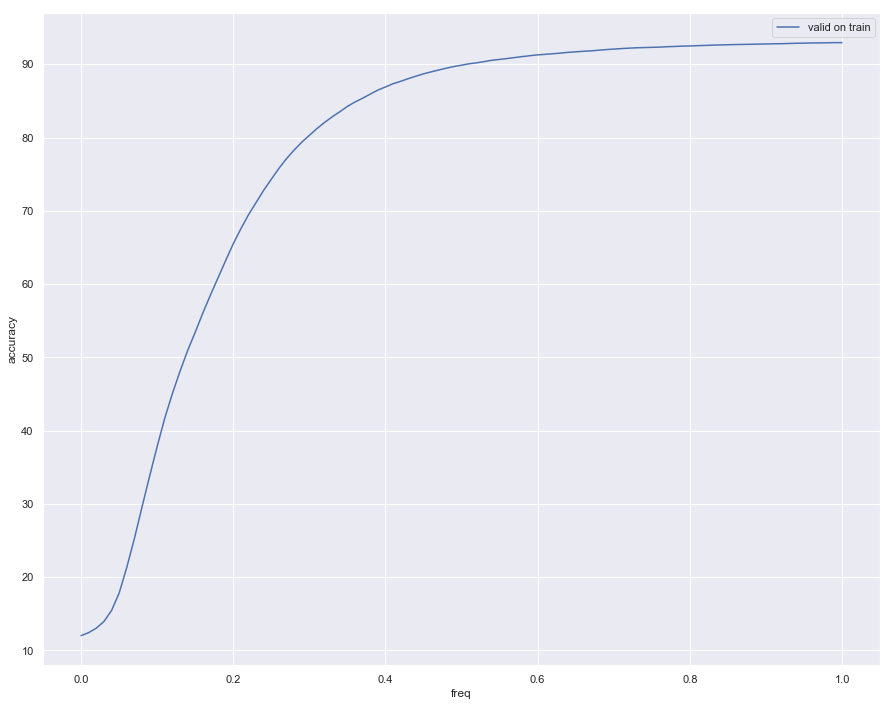

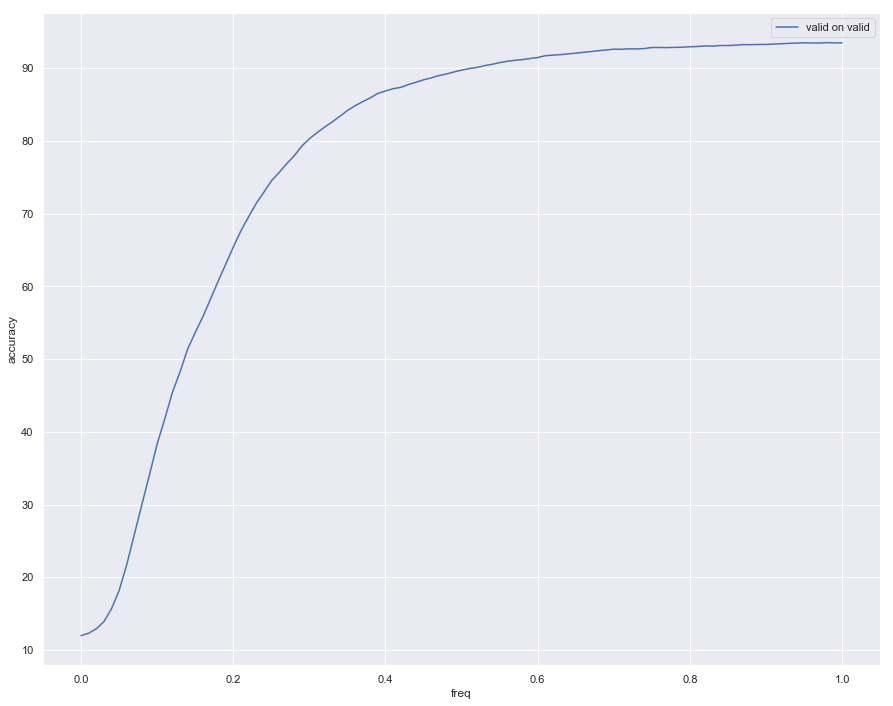

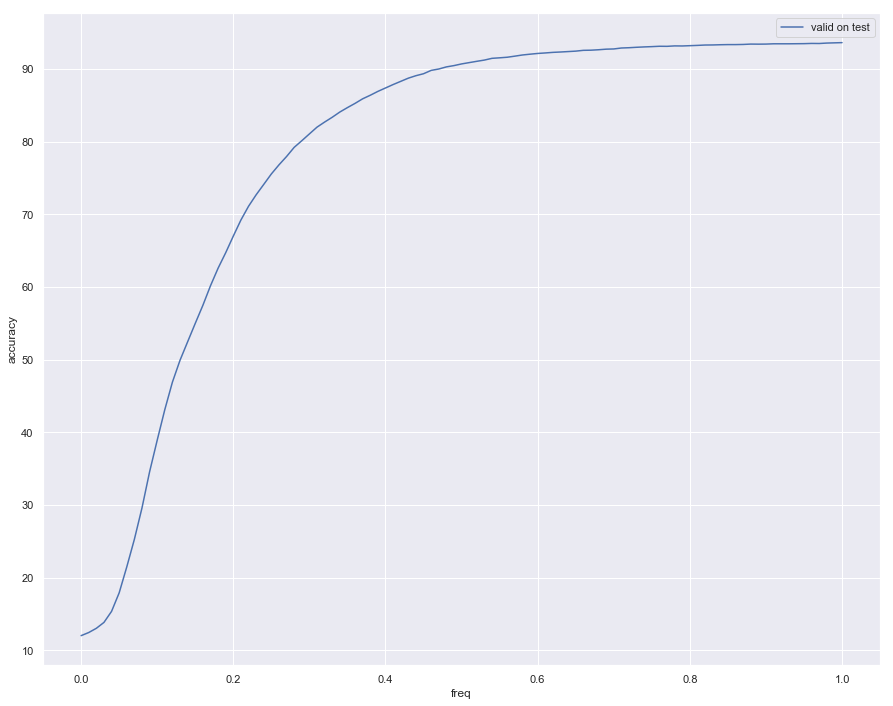

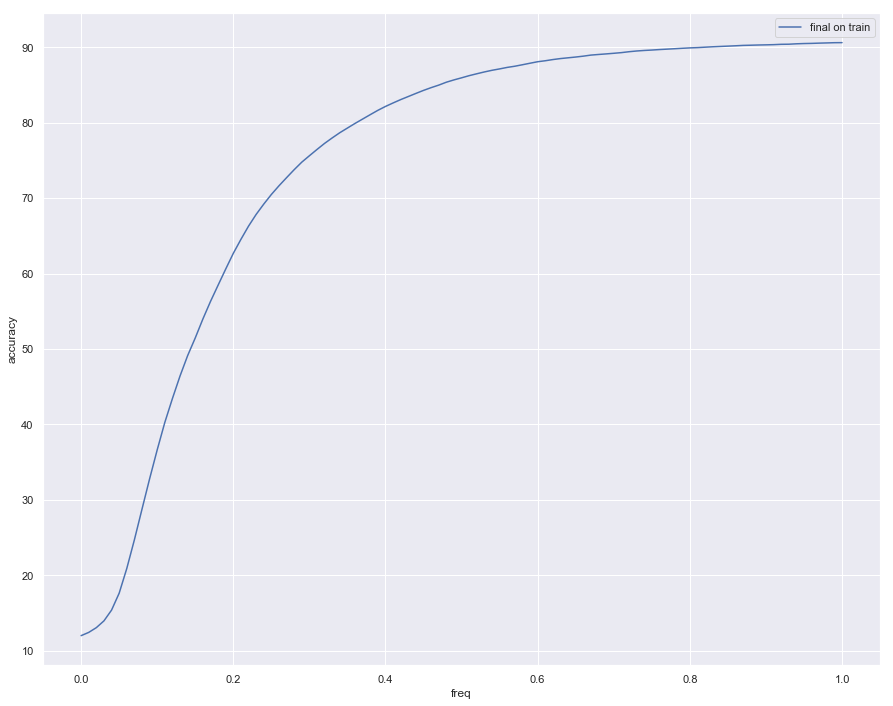

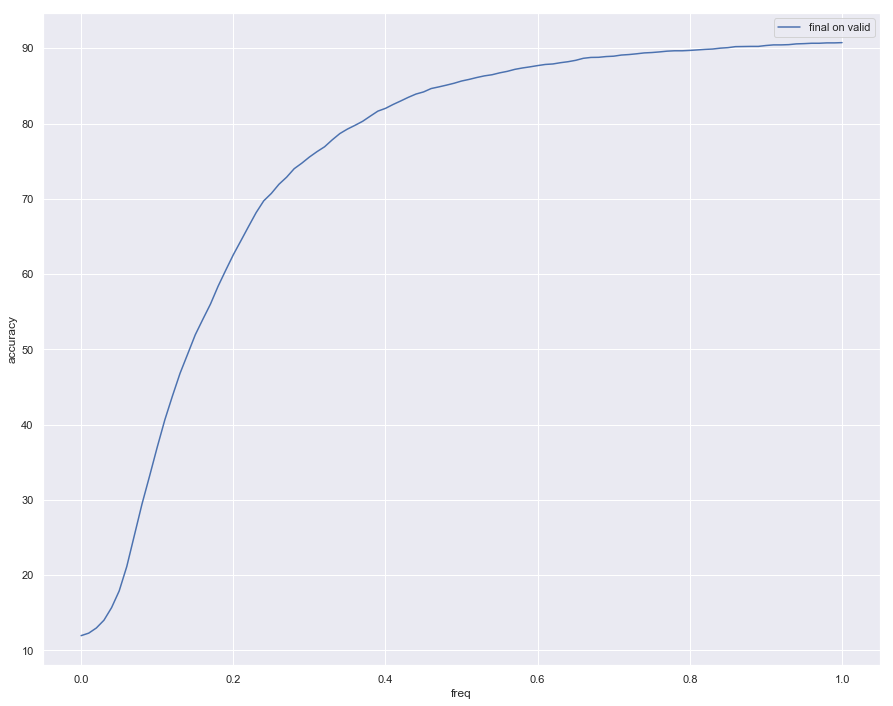

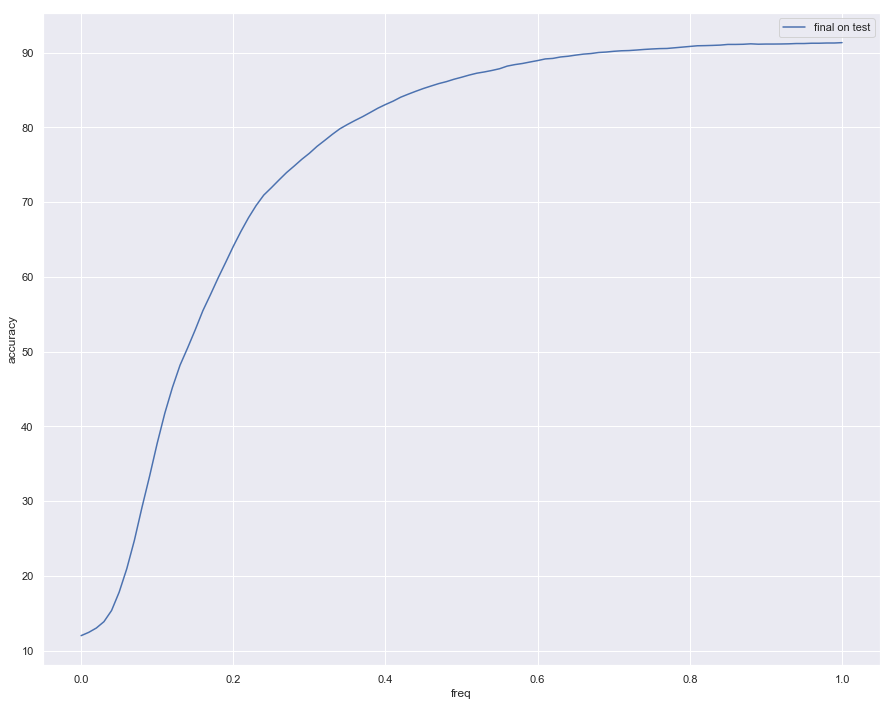

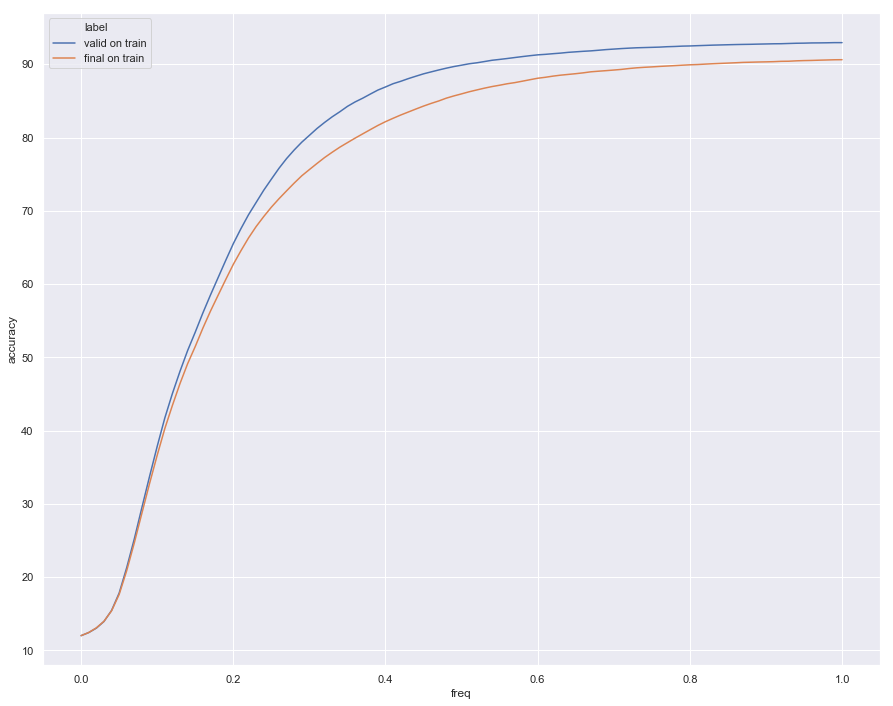

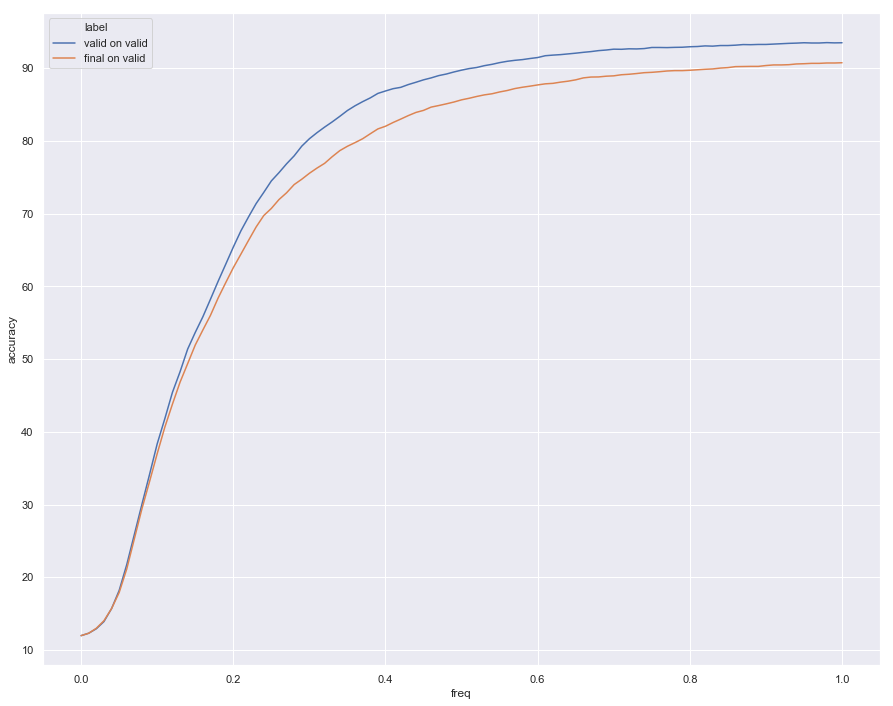

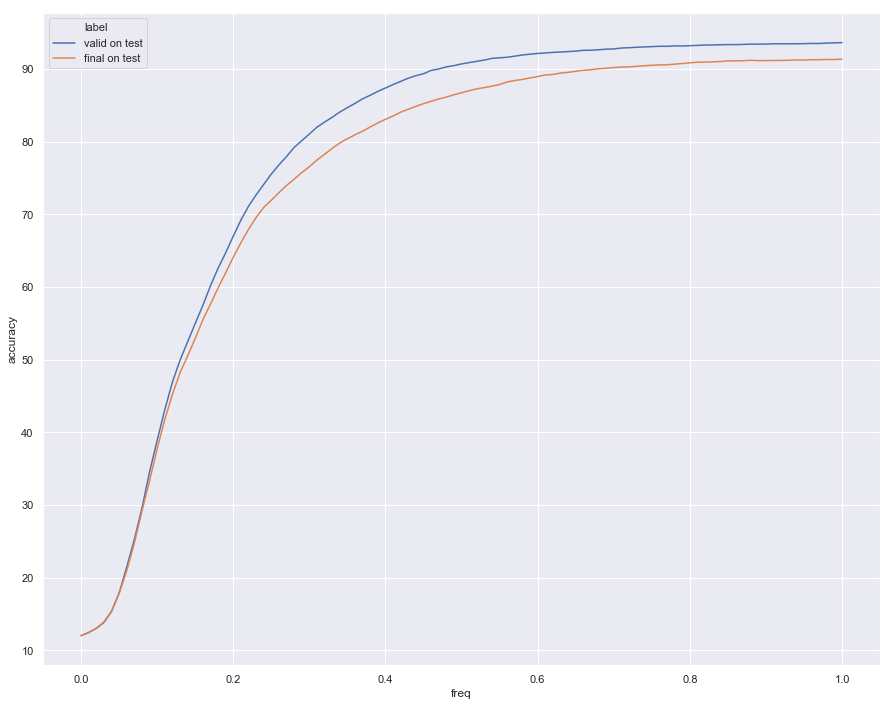

In [6]:
# to set up
path = '../cnn/experiment'


sns.set(rc={'figure.figsize':(15,12)})
path_valid = os.path.join(path, 'interpolation_val.csv')
path_final = os.path.join(path, 'interpolation_final.csv')

get_single_plot(path_valid, "valid")
get_single_plot(path_final, "final")

get_combined_plots(path_valid, path_final)